In [85]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [86]:
pi_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
pi_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)
pi_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
pi_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)
pi_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2013-2023_pwl_harmwl_bwl.csv')
pi_1323_LH.drop(labels=range(len(pi_1323_LH)-6,len(pi_1323_LH)), axis=0, inplace=True)
directory_path = '/Users/rprocious/Downloads/data/NOAA/portIsabel/'

dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

pi_NOAA = pd.concat(dataframes, ignore_index=True)
pi_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
pi_NOAA.reset_index(drop = True, inplace=True)
frames = [pi_9300_LH,pi_0112_LH,pi_1323_LH]
pi_LH = pd.concat(frames, ignore_index=True)
pi_LH.drop(labels=range(0,262800),axis=0, inplace=True)
pi_LH.reset_index(drop=True, inplace=True)

comparison_df = pd.DataFrame()
comparison_df['Dates'] = pi_LH['#date+time']
comparison_df['Lighthouse WL'] = pi_LH['018-pwl']
comparison_df['NOAA WL'] = pi_NOAA[' Water Level']

comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_55727/55218230.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_1993-2000_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_55727/55218230.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_55727/55218230.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  pi_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Port Isabel/PortIsabel_2013-2023_pwl_harmwl_bwl.csv')


,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.440,1.445
2454476,2023-12-31 23:36:00,1.445,1.451
2454477,2023-12-31 23:42:00,1.451,1.458
2454478,2023-12-31 23:48:00,1.458,1.464
2454479,2023-12-31 23:54:00,1.464,1.470


In [87]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


Text(0.5, 1.0, 'Port Isabell')

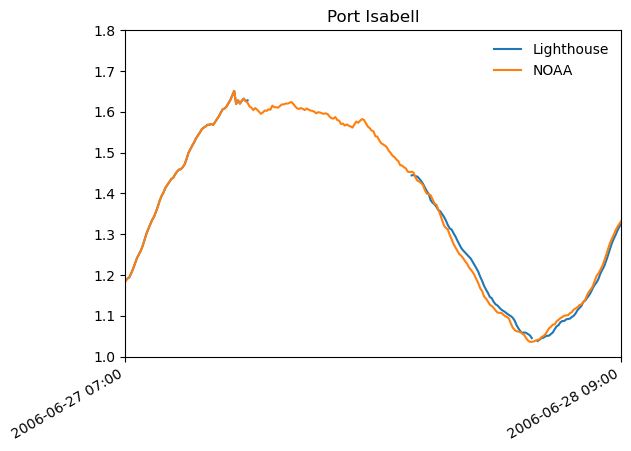

In [88]:
plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1,1.8)

start_date = pd.to_datetime('2006-06-27 07:00')

end_date = pd.to_datetime('2006-06-28 09:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Port Isabell')

In [89]:
date_index_locater('2006-06-28 00:00','2006-06-28 00:06')

[919440, 919441]

Time offset begins here

In [90]:
comparison_df[919410:919430]

,Dates,Lighthouse WL,NOAA WL
919410,2006-06-27 21:00:00,NaN,1.492
919411,2006-06-27 21:06:00,NaN,1.489
919412,2006-06-27 21:12:00,NaN,1.483
919413,2006-06-27 21:18:00,NaN,1.479
919414,2006-06-27 21:24:00,NaN,1.469
919415,2006-06-27 21:30:00,NaN,1.468
919416,2006-06-27 21:36:00,NaN,1.464
919417,2006-06-27 21:42:00,NaN,1.461
919418,2006-06-27 21:48:00,NaN,1.453
919419,2006-06-27 21:54:00,NaN,1.452


In [91]:
#drops a nan value before time shift
revised_LH = pd.DataFrame()
revised_LH['Adjusted LH WL'] = comparison_df['Lighthouse WL']
revised_LH.drop(919419,axis = 0, inplace=True)
revised_LH.reset_index(drop = True, inplace=True)
comparison_df['Shifted LH WL'] = revised_LH['Adjusted LH WL']
comparison_df[919500:919530]

,Dates,Lighthouse WL,NOAA WL,Shifted LH WL
919500,2006-06-28 06:00:00,1.087,1.100,1.091
919501,2006-06-28 06:06:00,1.091,1.101,1.092
919502,2006-06-28 06:12:00,1.092,1.101,1.093
919503,2006-06-28 06:18:00,1.093,1.106,1.097
919504,2006-06-28 06:24:00,1.097,1.109,1.100
919505,2006-06-28 06:30:00,1.100,1.115,1.106
919506,2006-06-28 06:36:00,1.106,1.118,1.114
919507,2006-06-28 06:42:00,1.114,1.121,1.119
919508,2006-06-28 06:48:00,1.119,1.126,1.124
919509,2006-06-28 06:54:00,1.124,1.128,1.134


In [97]:
differences = comparison_df['Shifted LH WL'] - comparison_df['NOAA WL']
non_zero_differences = differences != 0

filtered_differences = differences[non_zero_differences]
filtered_dates = comparison_df['Dates'][non_zero_differences]

# Convert the results to DataFrames
differences_df = filtered_differences.to_frame(name='Difference')
dates_df = filtered_dates.to_frame(name='Date')

# Combine the two DataFrames
remaining_differences = differences_df.join(dates_df, how='inner')

cleaned_remaining_differences = remaining_differences.dropna()
cleaned_remaining_differences.reset_index(drop = True, inplace=True)
mask = abs(cleaned_remaining_differences['Difference']) >= 0.005

cleaned_remaining_differences = cleaned_remaining_differences[mask]


for i in range(1, 11):
    cleaned_remaining_differences[f'Next_{i}'] = cleaned_remaining_differences['Difference'].shift(-i)

# Check if the current value is equal to the next 10 values
cleaned_remaining_differences['All_Next_10_Equal'] = cleaned_remaining_differences.apply(lambda row: all(row['Difference'] == row[f'Next_{i}'] for i in range(1, 11)), axis=1)

# Drop the helper columns if they are no longer needed
cleaned_remaining_differences.drop(columns=[f'Next_{i}' for i in range(1, 11)], inplace=True)


mask = cleaned_remaining_differences['All_Next_10_Equal'] == True

# Filter the DataFrame using the mask
cleaned_remaining_differences = cleaned_remaining_differences[mask]

# Reset index if needed
cleaned_remaining_differences.reset_index(drop=True, inplace=True)

cleaned_remaining_differences.to_clipboard()

0.121 Ofset from 2011-10-19 18:36 till 2011-10-20 11:54
0.005 offset from 2016-10-12 19:18 till 2016-10-13 10:36
-0.012 offset from 2016-10-13 13:30 till 2016-10-18 14:42
-0.006 offset from 2018-11-05 15:24 till 2019-03-07 13:24

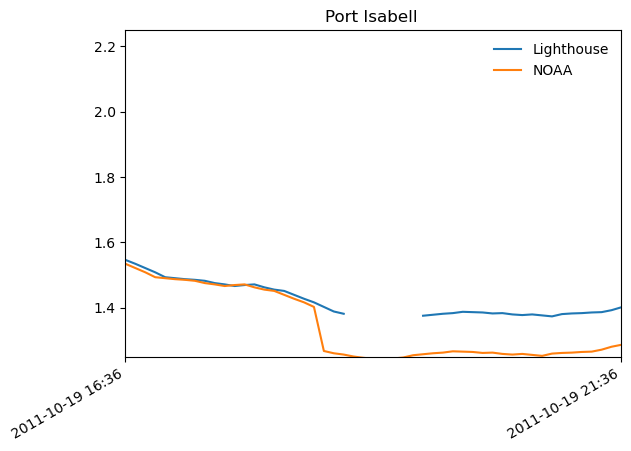

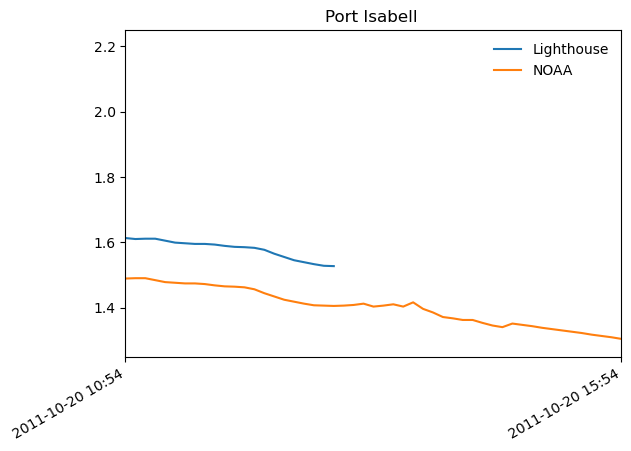

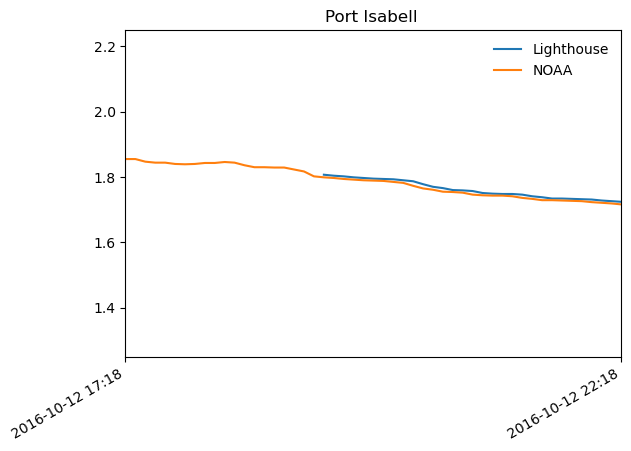

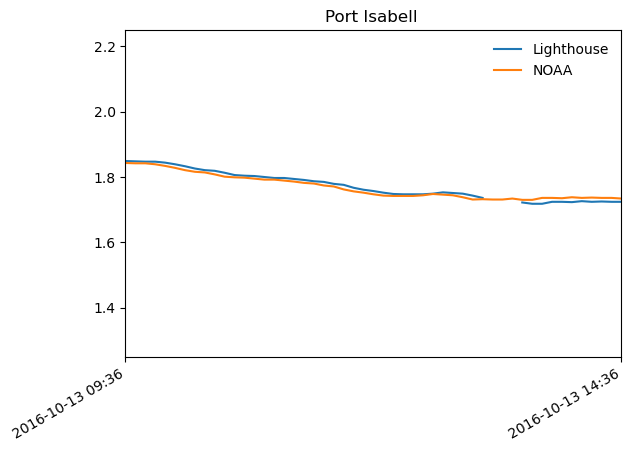

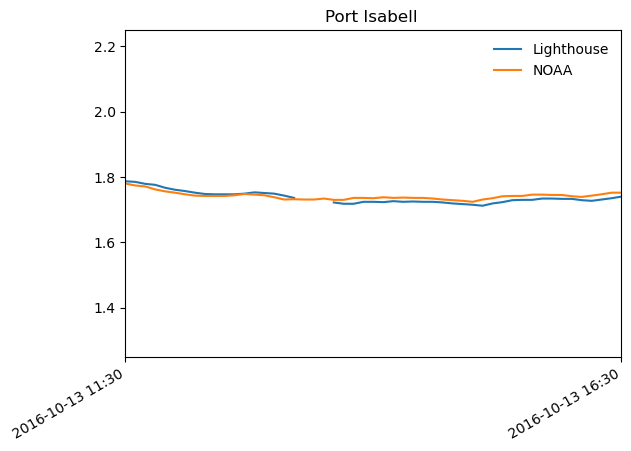

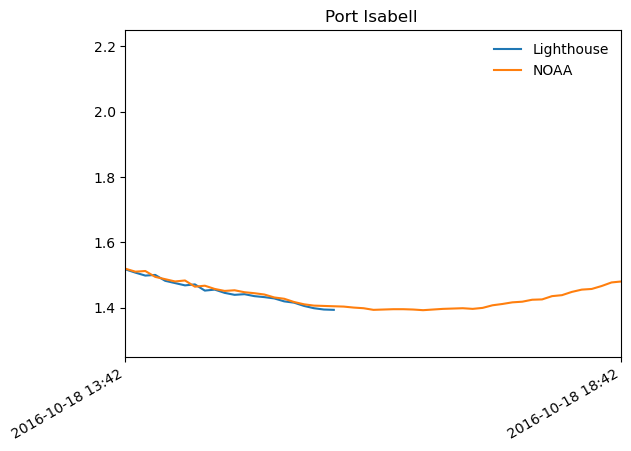

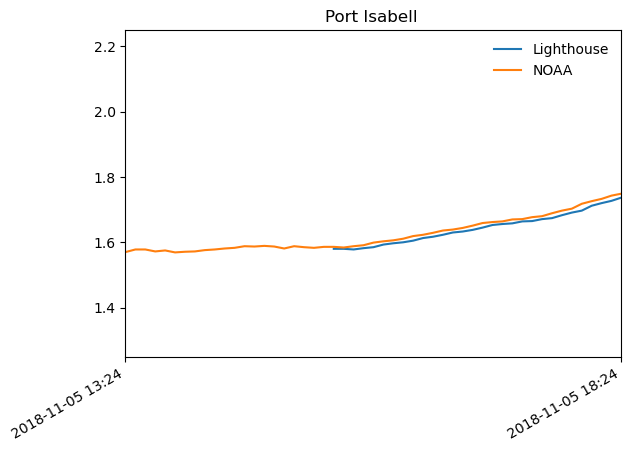

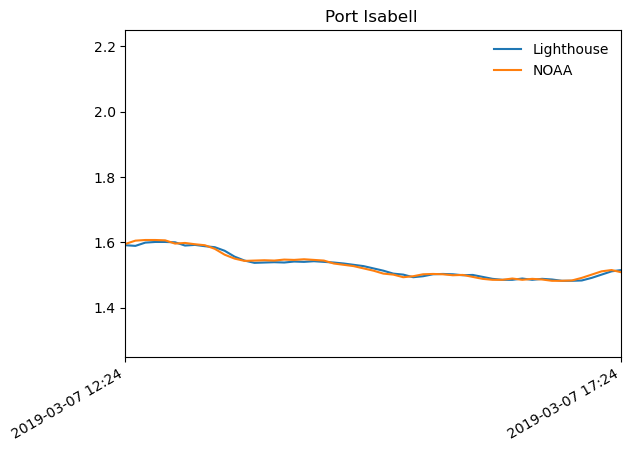

In [106]:
start_dates = ('2011-10-19 17:36','2011-10-20 11:54','2016-10-12 18:18','2016-10-13 10:36','2016-10-13 12:30','2016-10-18 14:42','2018-11-05 14:24','2019-03-07 13:24')

for i in range(len(start_dates)):
    plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

    plt.plot(comparison_df['Dates'],comparison_df['NOAA WL'],label = 'NOAA')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

    plt.gcf().autofmt_xdate()

    plt.ylim(1.25,2.25)

    start_date = pd.to_datetime(start_dates[i]) - pd.DateOffset(hours= 1)

    end_date = pd.to_datetime(start_dates[i]) + pd.DateOffset(hours = 4)

    plt.xlim(start_date, end_date)
    plt.legend(frameon = False)
    plt.title('Port Isabell ')
    plt.show()